## <font color = green> Classification Model - Building-Machine-Learning-Pipeline-on-Startups-Acquisition.

#### Topic: Building-Machine-Learning-Pipeline-on-Startups-Acquisition

#### Objective: The objective of the project is to predict whether a startup which is currently Operating, IPO, Acquired, or closed.This problem will be solved through a Supervised Machine Learning approach by training a model based on the history of startups which were either acquired or closed. 

### <font color = blue>  Import the necessary Libraries & Load the dataset into python environment : 

In [1]:
import numpy as np
import pandas as pd

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn class that helps to take care of missing values:
from sklearn.impute import SimpleImputer

# To handle outliers:
from scipy.stats import zscore

# Calculate the mutual information between features and a target variable for classification problems: 
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression

# Transform high-dimensional data into a lower-dimensional form while retaining the most important information:
from sklearn.decomposition import PCA

# Split the data for training and testing:
from sklearn.model_selection import train_test_split

# Classification algorithms:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Analysis of classificaiton algorithms:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Model Selection:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

# For cross validation:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# To apply a specified function to each element or to the entire input data:
from sklearn.preprocessing import FunctionTransformer

# For handling imbalanced datasets:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# To serialize and deserialize Python objects:
import pickle

# Remove warnings:
import warnings
warnings.filterwarnings('ignore')

#### Loading dataset

In [2]:
company = pd.read_csv(r'C:\Users\Vignesh\Desktop\companies.csv') 

### <font color = blue> Perform Data Understanding:   

In [3]:
# Display the entire content of DataFrames:

pd.set_option('display.max_columns', None)
pd.set_option('display.width',None)
pd.set_option('display.max_rows',None)

In [4]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [5]:
# Information about the dataframe:

company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [6]:
# Summarize the data by generating descriptive statistics of Numerical columns:

company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [7]:
# Summarize the data by generating descriptive statistics of Categorical columns:

company.describe(include = object).transpose()  

,count,unique,top,freq
id,196553,196553,c:1,1
entity_type,196553,1,Company,196553
name,196531,196348,L,8
normalized_name,196527,195451,l,9
permalink,196553,196512,/company/bboescape,3
category_code,123186,42,software,17922
status,196553,4,operating,183441
founded_at,91227,6156,2011-01-01,3748
closed_at,2620,925,2012-01-01,176
domain,126545,125498,placeshilton.com,44


In [8]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## <font color = blue>Data Preprocessing:

## A. Data Cleaning


#### 1. Deleting irrelevant and redundant information

In [9]:
# checking for the null values

company.isnull().sum().sort_values(ascending=False)

parent_id              196553
ROI                    195827
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
closed_at              193933
short_description      189422
funding_total_usd      168679
last_funding_at        165046
first_funding_at       165046
funding_rounds         164846
state_code             145650
twitter_username       115962
tag_list               115101
lat                    112701
lng                    112701
city                   112663
country_code           108563
founded_at             105326
first_milestone_at     104854
milestones             104854
last_milestone_at      104854
description            104505
logo_height             86443
logo_width              86443
logo_url                86443
category_code           73367
homepage_url            70008
domain                  70008
overview                69582
relationships           66886
created_by              41020
normalized

#### 1.a. Delete 'region','city' as they provide too much of granularity.

In [10]:
# Deleting 'region', 'city', 'state_code', as they provide too much of granularity

company.drop(columns=['state_code','city','region'], inplace=True)

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [11]:
# Deleting 'id',  'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by','created_at', 'updated_at' as they are redundant.

company.drop(columns=['id',  'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by','created_at', 'updated_at'],inplace=True)

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [12]:
# Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

company.drop(columns=['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], inplace=True)

#### 1.d. Delete duplicate values if found any.

In [13]:
# Check if there are any duplicates

company.duplicated().any()

True

In [14]:
# Delete duplicate values if any

company.drop_duplicates(inplace=True)

In [15]:
company.duplicated().sum()

0

In [16]:
company.isnull().sum().sort_values(ascending=False)

ROI                    108738
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
closed_at              106845
funding_total_usd       81602
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
founded_at              26913
country_code            24870
category_code           12230
status                      0
dtype: int64

#### 1.e. Delete those which has more than 98% of null values.

In [17]:
# Calculate the percentage of null values for each columns

print('percantage of null values in each column\n')
print((company.isnull().mean()*100).sort_values(ascending=False))

percantage of null values in each column

ROI                    99.336768
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
closed_at              97.607433
funding_total_usd      74.546883
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
founded_at             24.586165
country_code           22.719798
category_code          11.172623
status                  0.000000
dtype: float64


In [18]:
# Dropping the columns that has more than 98% null values

company.drop('ROI', axis=1, inplace=True)

In [19]:
# Since we can see only nan values so let's check how much of ros has nan values

company.isnull().sum().sort_values(ascending=False)

first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
closed_at              106845
funding_total_usd       81602
last_funding_at         77992
first_funding_at        77992
funding_rounds          77793
last_milestone_at       53353
milestones              53353
first_milestone_at      53353
relationships           34403
lat                     28363
lng                     28363
founded_at              26913
country_code            24870
category_code           12230
status                      0
dtype: int64

#### 2.a.Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
(Since these are the type of data where adding value via imputation will create wrong pattern only)

In [20]:
# Define the columns to check for missing values

columns_to_check = ['status', 'country_code', 'category_code', 'founded_at']
company.dropna(subset=columns_to_check, inplace=True)


In [21]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851


In [22]:
# Since we can see only nan values so let's check how much of rows has nan values.

company.isnull().sum().sort_values(ascending=False)

first_investment_at    62837
last_investment_at     62837
investment_rounds      62836
closed_at              61924
funding_total_usd      43118
last_funding_at        40836
first_funding_at       40836
funding_rounds         40696
last_milestone_at      28341
milestones             28341
first_milestone_at     28341
relationships          15290
lat                     2374
lng                     2374
status                     0
country_code               0
founded_at                 0
category_code              0
dtype: int64

### Outlier Handling:

#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

#### 2.b.1. Find the IQR

In [23]:
# For funding_total_usd
check_ftu = 'funding_total_usd'

# Calculate Q1 and Q3
Q1 = company[check_ftu].quantile(0.25)
Q3 = company[check_ftu].quantile(0.75)

IQR_ftu = Q3 - Q1

In [24]:
IQR_ftu

11488962.0

In [25]:
# For funding_rounds
check_fr = 'funding_rounds'

# Calculate Q1 and Q3
Q1 = company[check_fr].quantile(0.25)
Q3 = company[check_fr].quantile(0.75)

IQR_fr = Q3 - Q1

In [26]:
IQR_fr

1.0

#### 2.b.1. Find the Upper and Lower limit

In [27]:
# For funding_total_usd
lower_limit_ftu = Q1 - 1.5 * IQR_ftu
upper_limit_ftu = Q3 + 1.5 * IQR_ftu

print(f"Lower Limit for {check_ftu}: {lower_limit_ftu }")
print(f"Upper Limit for {check_ftu}: {upper_limit_ftu}")

Lower Limit for funding_total_usd: -17233442.0
Upper Limit for funding_total_usd: 17233445.0


In [28]:
# For funding_rounds
lower_limit_fr = Q1 - 1.5 * IQR_fr
upper_limit_fr = Q3 + 1.5 * IQR_fr

print(f"Lower Limit for {check_fr}: {lower_limit_fr }")
print(f"Upper Limit for {check_fr}: {upper_limit_fr}")

Lower Limit for funding_rounds: -0.5
Upper Limit for funding_rounds: 3.5


#### 2.b.1.  Find outliers

In [29]:
# For funding_total_usd
outliers_ftu = company[(company[check_ftu]< lower_limit_ftu)| (company[check_ftu]> upper_limit_ftu)]

In [30]:
# For funding_rounds
# outliers_fr = company[(company['funding_rounds']< lower_limit_fr)| (company['funding_rounds']> upper_limit_fr)]
# outliers_fr

#### 2.b.1. Drop the outliers

In [31]:
# For funding_total_usd
company.drop(outliers_ftu.index, inplace=True)

In [32]:
# For funding_rounds

# company.drop(outliers_fr.index, inplace=True)
# company.drop(index=outliers_fr, inplace=True)

company.drop(company[(company['funding_rounds']< lower_limit_fr)| (company['funding_rounds']> upper_limit_fr)].index, inplace=True)

In [33]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  object 
 3   closed_at            1496 non-null   object 
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     18018 non-null  object 
 9   last_funding_at      18018 non-null  object 
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   31636 non-null  object 
 13  last_milestone_at    31636 non-null  object 
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

#### 2.c. Delete contradictory (mutually opposed or inconsistent data).

In [34]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

In [35]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  object 
 3   closed_at            1496 non-null   object 
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     18018 non-null  object 
 9   last_funding_at      18018 non-null  object 
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   31636 non-null  object 
 13  last_milestone_at    31636 non-null  object 
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

## B. Date Transformation
    It can be divided into two successive phases.
   ### 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ### 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

### Handle Date Columns: 

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [36]:
# founded_at
company['founded_at'] = company['founded_at'].fillna('2021')
company['founded_at'] = company['founded_at'].str[0:4].astype(int)

# closed_at
company['closed_at'] = company['closed_at'].fillna('2021')
company['closed_at'] = company['closed_at'].str[0:4].astype(int)

# first_funding_at
company['first_funding_at'] = company['first_funding_at'].fillna('2021')
company['first_funding_at'] = company['first_funding_at'].str[0:4].astype(int)

# last_funding_at
company['last_funding_at'] = company['last_funding_at'].fillna('2021')
company['last_funding_at'] = company['last_funding_at'].str[0:4].astype(int)

# first_milestone_at
company['first_milestone_at'] = company['first_milestone_at'].fillna('2021')
company['first_milestone_at'] = company['first_milestone_at'].str[0:4].astype(int)

# last_milestone_at
company['last_milestone_at'] = company['last_milestone_at'].fillna('2021')
company['last_milestone_at'] = company['last_milestone_at'].str[0:4].astype(int)

### Encoding:

#### 1.b. Generalize the categoricaldata i.e. category_code and  country_code

In [37]:
# 1. category_code

print(company['category_code'].nunique())
print(company['country_code'].nunique())

42
165


In [38]:
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.

column_name = 'category_code'
value_counts = company[column_name].value_counts()

In [39]:
value_counts

software            10715
web                  7697
ecommerce            4786
other                4688
mobile               3629
advertising          3525
consulting           2767
games_video          2745
enterprise           2388
biotech              1851
public_relations     1538
hardware             1384
network_hosting      1231
education            1135
search                964
cleantech             737
social                639
finance               622
analytics             612
security              591
health                584
legal                 360
medical               324
travel                322
semiconductor         319
news                  275
manufacturing         263
fashion               261
hospitality           258
real_estate           219
local                 195
photo_video           194
messaging             177
music                 176
sports                163
transportation        123
nonprofit             112
design                105
automotive  

In [40]:
top_10_values_category = value_counts.head(10)
top_10_values_category

software       10715
web             7697
ecommerce       4786
other           4688
mobile          3629
advertising     3525
consulting      2767
games_video     2745
enterprise      2388
biotech         1851
Name: category_code, dtype: int64

In [41]:
# remaining categories
Other_values = company[~company[column_name].isin(top_10_values_category.index)][column_name]

# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.
company.loc[Other_values.index,column_name] = "Other"
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007,2021,MAR,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107
6,Other,operating,2008,2021,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964


In [42]:
# Let's check if we've more than 15 columns
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int32  
 3   closed_at            58854 non-null  int32  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int32  
 9   last_funding_at      58854 non-null  int32  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int32  
 13  last_milestone_at    58854 non-null  int32  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

In [43]:
# # One-hot encoding to category_code
# company_OHE = pd.get_dummies(company['category_code'], prefix= 'category_code')

# # Concatenate category with company dataset
# company = pd.concat([company, company_OHE], axis=1)

# # Since, We've added the encoded category_columns, let's delete original category_code
# company.drop(columns=['category_code'],inplace=True)

### Let's encode 'country' column now.

In [44]:
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other

col_name = 'country_code'
value_counts_country = company[col_name].value_counts()

In [45]:
# top 10 values
top_10_values_country = value_counts_country.head(10)
top_10_values_country

USA    32986
GBR     4905
IND     2960
CAN     2579
DEU     1342
FRA     1200
AUS     1023
ESP      876
ISR      739
NLD      648
Name: country_code, dtype: int64

In [46]:
# remaining country_code
Other_values_country = company[~company[col_name].isin(top_10_values_country.index)][col_name]

# Lets keep the country as same of it falls under above 10 otherwise let's replace it with other.
company.loc[Other_values_country.index,col_name] = "Other"
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007,2021,Other,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107
6,Other,operating,2008,2021,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964


In [47]:
# # One-hot encoding to country_code
# company_OHE_country = pd.get_dummies(company['country_code'], prefix='country_code')

# # Concatenate country with company dataset
# company = pd.concat([company, company_OHE_country], axis=1)

# # Since, We've added the encoded country_columns, let's delete original country_code
# company.drop(columns=['country_code'],inplace=True)

In [48]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int32  
 3   closed_at            58854 non-null  int32  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int32  
 9   last_funding_at      58854 non-null  int32  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int32  
 13  last_milestone_at    58854 non-null  int32  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

### 2. Create new variables¶


    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.

```
- if the value in status is 'operating' or 'ipo', Let's put 1.
- Where as if the value is 'acquired' or 'closed', let's put 0.
```



In [49]:
# Create new feature 'isClosed'

company['isClosed'] = ((company['status'] != 'operating') & (company['status'] != 'ipo')).astype(int)
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
5,advertising,operating,2007,2021,Other,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,0
6,Other,operating,2008,2021,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,0
12,advertising,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,0
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1
15,games_video,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964,0


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days,
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

#### 2.b.i Replacing the values in closed_at column
- if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
- Where as if the value is 'acquired' or 'closed', let's put 0.

In [50]:
# Filling the missing values in 'closed_at column'

# If the 'status' column contains 'operating' or 'ipo', fill 'closed_at' with 2021
condition = company['status'].str.contains('operating|ipo', case=False, na=False)
company['closed_at'] = np.where(condition, 2021, company['closed_at'])

# If the 'status' column does not contain 'operating' or 'ipo', and 'closed_at' is NaN, set it to 0
company['closed_at'] = np.where(~condition & company['closed_at'].isna(), 0, company['closed_at'])

In [51]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
5,advertising,operating,2007,2021,Other,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,0
6,Other,operating,2008,2021,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,0
12,advertising,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,0
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1
15,games_video,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964,0


2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [52]:
# Adding 'active_days' column by subtracting 'founded_at' from 'closed_at' columns

company['active_days'] = (company['closed_at'] - company['founded_at'])*365

In [53]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int32  
 3   closed_at            58854 non-null  int32  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int32  
 9   last_funding_at      58854 non-null  int32  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int32  
 13  last_milestone_at    58854 non-null  int32  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

In [54]:
index= np.where(company['active_days']<0)
company['active_days']= company['active_days'].drop(company['active_days'].index[index])

In [55]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int32  
 3   closed_at            58854 non-null  int32  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int32  
 9   last_funding_at      58854 non-null  int32  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int32  
 13  last_milestone_at    58854 non-null  int32  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

In [56]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
5,advertising,operating,2007,2021,Other,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,0,5110.0
6,Other,operating,2008,2021,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,0,4745.0
12,advertising,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,0,4745.0
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1,5110.0
15,games_video,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964,0,4745.0


In [57]:
company['active_days'] = company['active_days'].fillna(0)
company['active_days'].head()

5     5110.0
6     4745.0
12    4745.0
13    5110.0
15    4745.0
Name: active_days, dtype: float64

In [58]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int32  
 3   closed_at            58854 non-null  int32  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int32  
 9   last_funding_at      58854 non-null  int32  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int32  
 13  last_milestone_at    58854 non-null  int32  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

#### 2.b.iii. Then, delete the closed_at column.

In [59]:
company.drop('closed_at', inplace=True, axis=1)

### Let's work on target variabe now.

### Missing Value Handling: 

### Remove the null vaues with the mean value in 'Numerical Data'

In [60]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int32  
 3   country_code         58854 non-null  object 
 4   first_investment_at  644 non-null    object 
 5   last_investment_at   644 non-null    object 
 6   investment_rounds    645 non-null    float64
 7   first_funding_at     58854 non-null  int32  
 8   last_funding_at      58854 non-null  int32  
 9   funding_rounds       18158 non-null  float64
 10  funding_total_usd    15747 non-null  float64
 11  first_milestone_at   58854 non-null  int32  
 12  last_milestone_at    58854 non-null  int32  
 13  milestones           31636 non-null  float64
 14  relationships        43854 non-null  float64
 15  lat                  56552 non-null

In [61]:
# Imputing Numerical columns using mean:

company['funding_rounds'].fillna(company['funding_rounds'].mean(), inplace=True)
company['funding_total_usd'].fillna(company['funding_total_usd'].mean(), inplace=True)
company['investment_rounds'].fillna(company['investment_rounds'].mean(), inplace=True)
company['milestones'].fillna(company['milestones'].mean(), inplace=True)
company['relationships'].fillna(company['relationships'].mean(), inplace=True)
company['lat'].fillna(company['lat'].mean(), inplace=True)
company['lng'].fillna(company['lng'].mean(), inplace=True)

In [62]:
# Filling missing values in Categorical columns with mode:

company['first_investment_at'].fillna(company['first_investment_at'].mode().iloc[0], inplace=True)
company['last_investment_at'].fillna(company['last_investment_at'].mode().iloc[0], inplace=True)

In [63]:
# checking for the null values

company.isnull().sum().sort_values(ascending=False)

category_code          0
funding_total_usd      0
isClosed               0
lng                    0
lat                    0
relationships          0
milestones             0
last_milestone_at      0
first_milestone_at     0
funding_rounds         0
status                 0
last_funding_at        0
first_funding_at       0
investment_rounds      0
last_investment_at     0
first_investment_at    0
country_code           0
founded_at             0
active_days            0
dtype: int64

In [64]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int32  
 3   country_code         58854 non-null  object 
 4   first_investment_at  58854 non-null  object 
 5   last_investment_at   58854 non-null  object 
 6   investment_rounds    58854 non-null  float64
 7   first_funding_at     58854 non-null  int32  
 8   last_funding_at      58854 non-null  int32  
 9   funding_rounds       58854 non-null  float64
 10  funding_total_usd    58854 non-null  float64
 11  first_milestone_at   58854 non-null  int32  
 12  last_milestone_at    58854 non-null  int32  
 13  milestones           58854 non-null  float64
 14  relationships        58854 non-null  float64
 15  lat                  58854 non-null

In [65]:
# Saving the csv file
company.to_csv('cleaned_companies.csv', index=False)

## <font color = blue> Exploratory Data Analysis:

#### Univariate Analysis

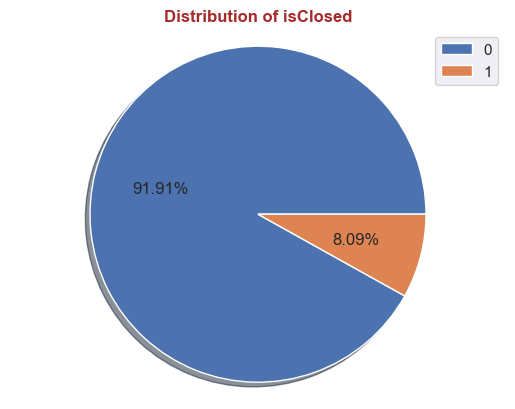

In [66]:
count = company['isClosed'].value_counts().tolist()
labels = company['isClosed'].value_counts().index.tolist()
plt.pie(count, autopct='%.2f%%', shadow=True)
plt.legend(labels,loc = 'best')
plt.title('Distribution of isClosed',color='brown', fontweight='bold')
plt.axis('equal')

plt.show()

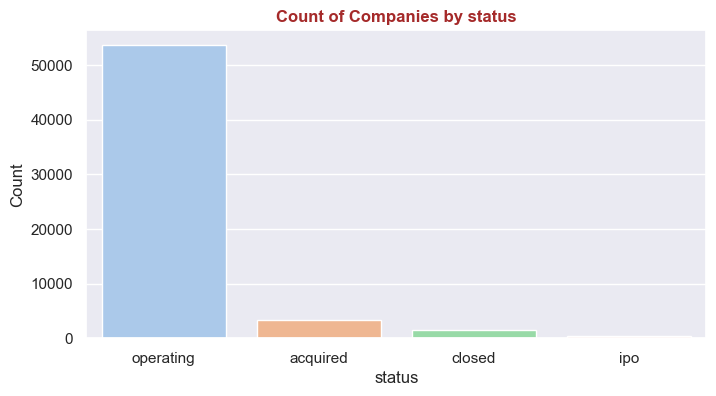

In [67]:
plt.figure(figsize=(8, 4))
sns.countplot(x='status', data=company, palette='pastel')
plt.title('Count of Companies by status', color='brown', fontweight='bold')
plt.xlabel('status')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='founded_at', ylabel='Count'>

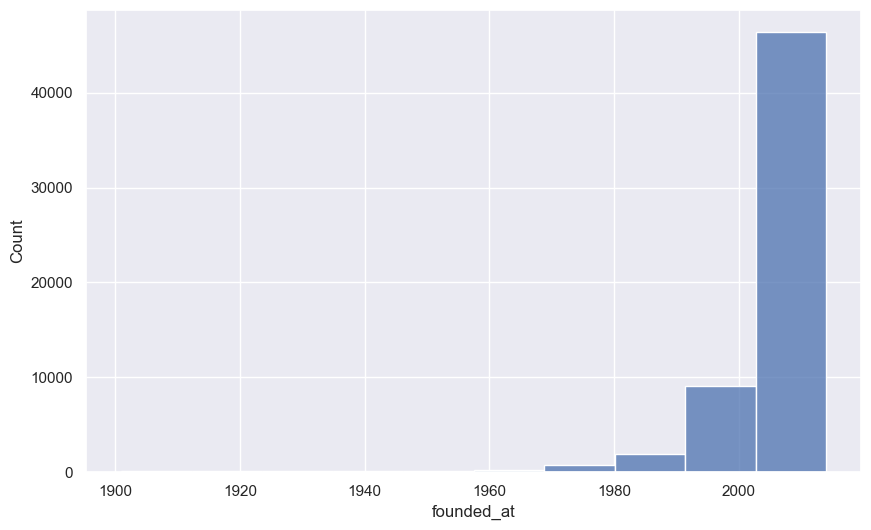

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(company.founded_at, bins = 10)

<Axes: xlabel='active_days', ylabel='Count'>

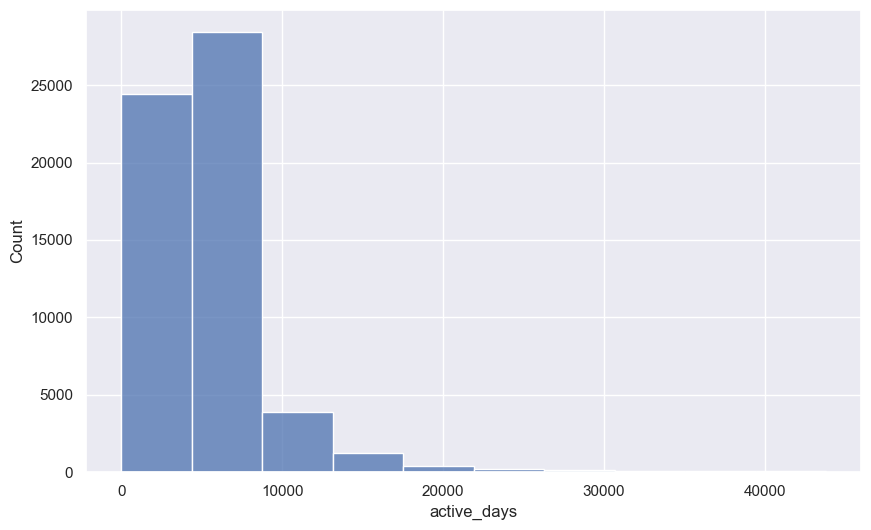

In [69]:
plt.figure(figsize=(10,6))
sns.histplot(company.active_days, bins = 10)

<Axes: xlabel='first_milestone_at', ylabel='Count'>

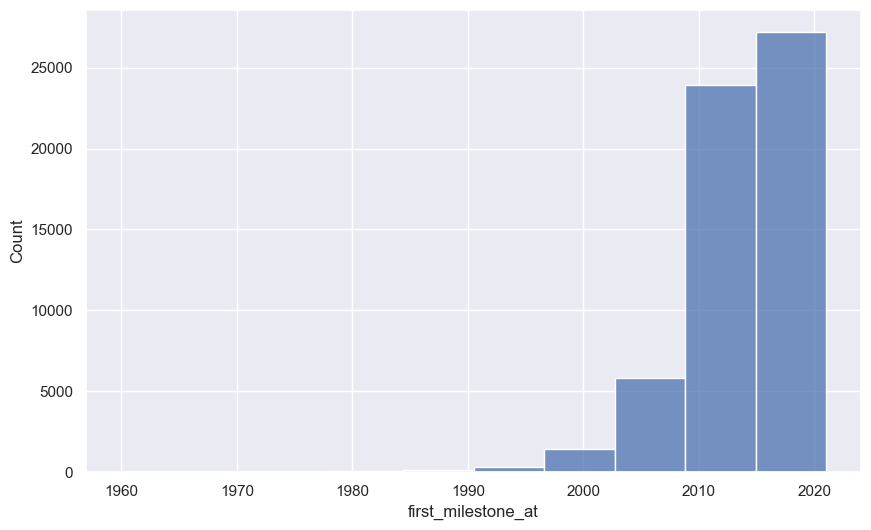

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(company.first_milestone_at, bins = 10)

<Axes: xlabel='last_milestone_at', ylabel='Count'>

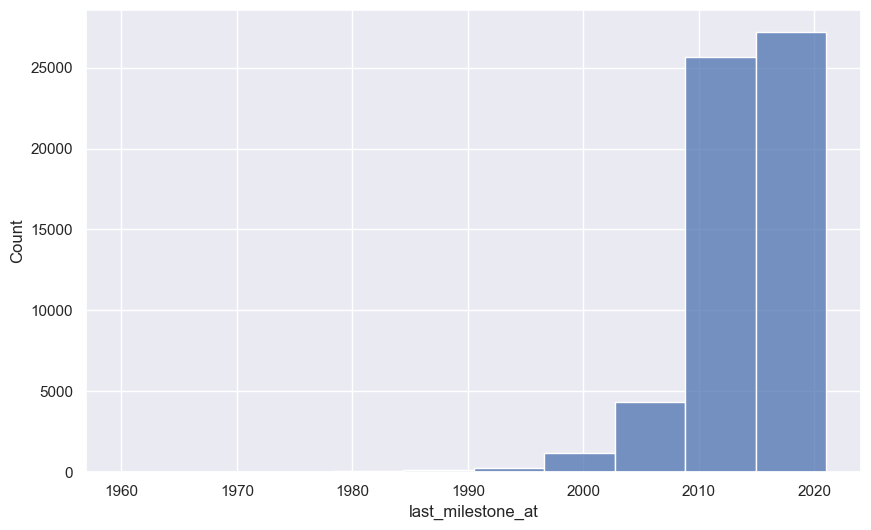

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(company.last_milestone_at, bins = 10)

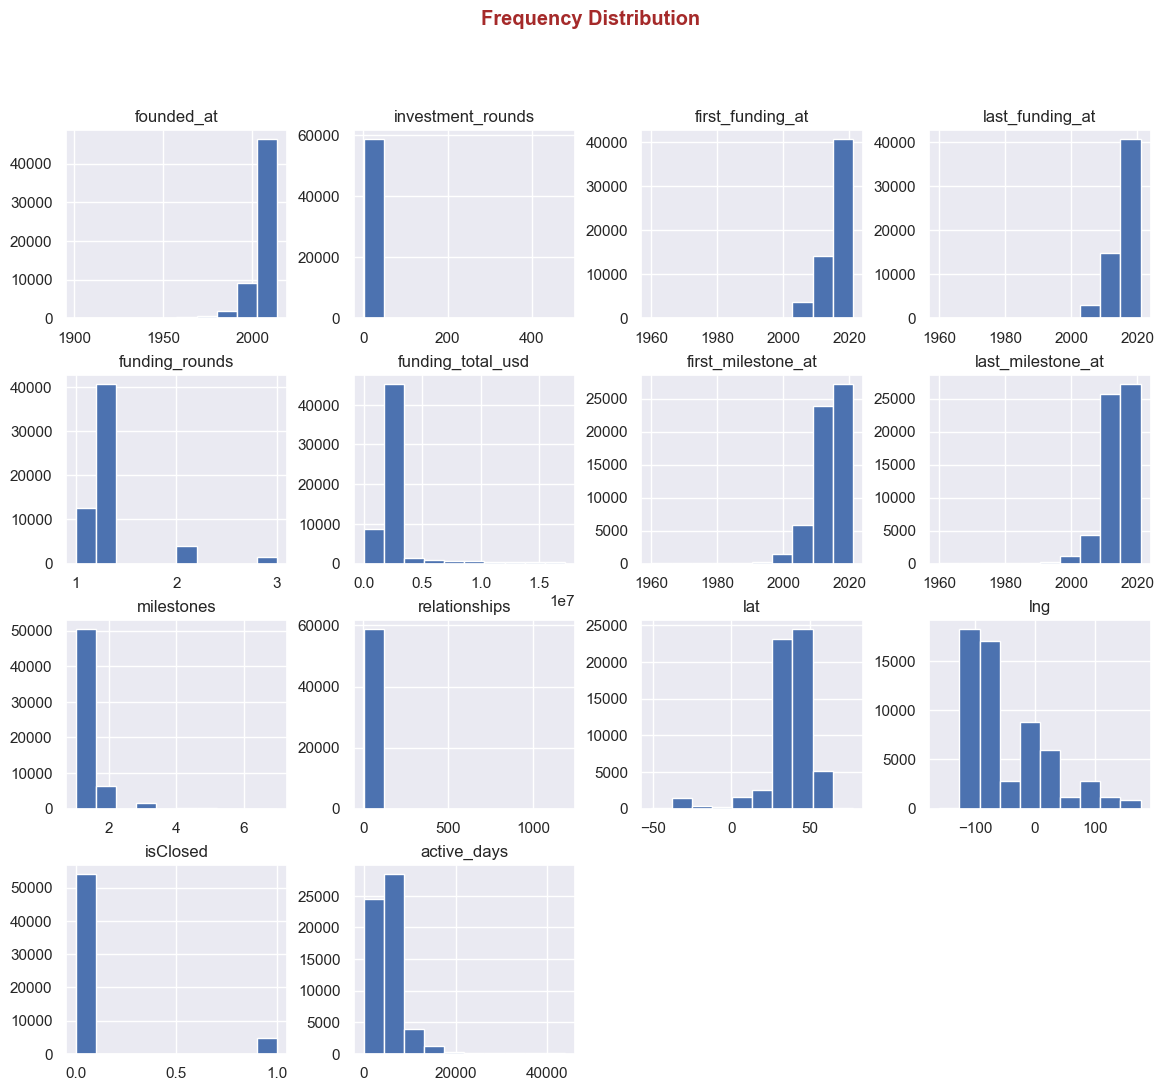

In [72]:
# Frequency Distribution of Columns:

# Select columns with company types float, int, and uint8
freqgraph = company.select_dtypes(include=['float', 'int'])

# Create histograms for selected columns
freqgraph.hist(figsize=(14, 12))
plt.suptitle('Frequency Distribution',color='brown', fontweight='bold')
plt.show()

#### Bivariate Analysis

Text(0, 0.5, 'count')

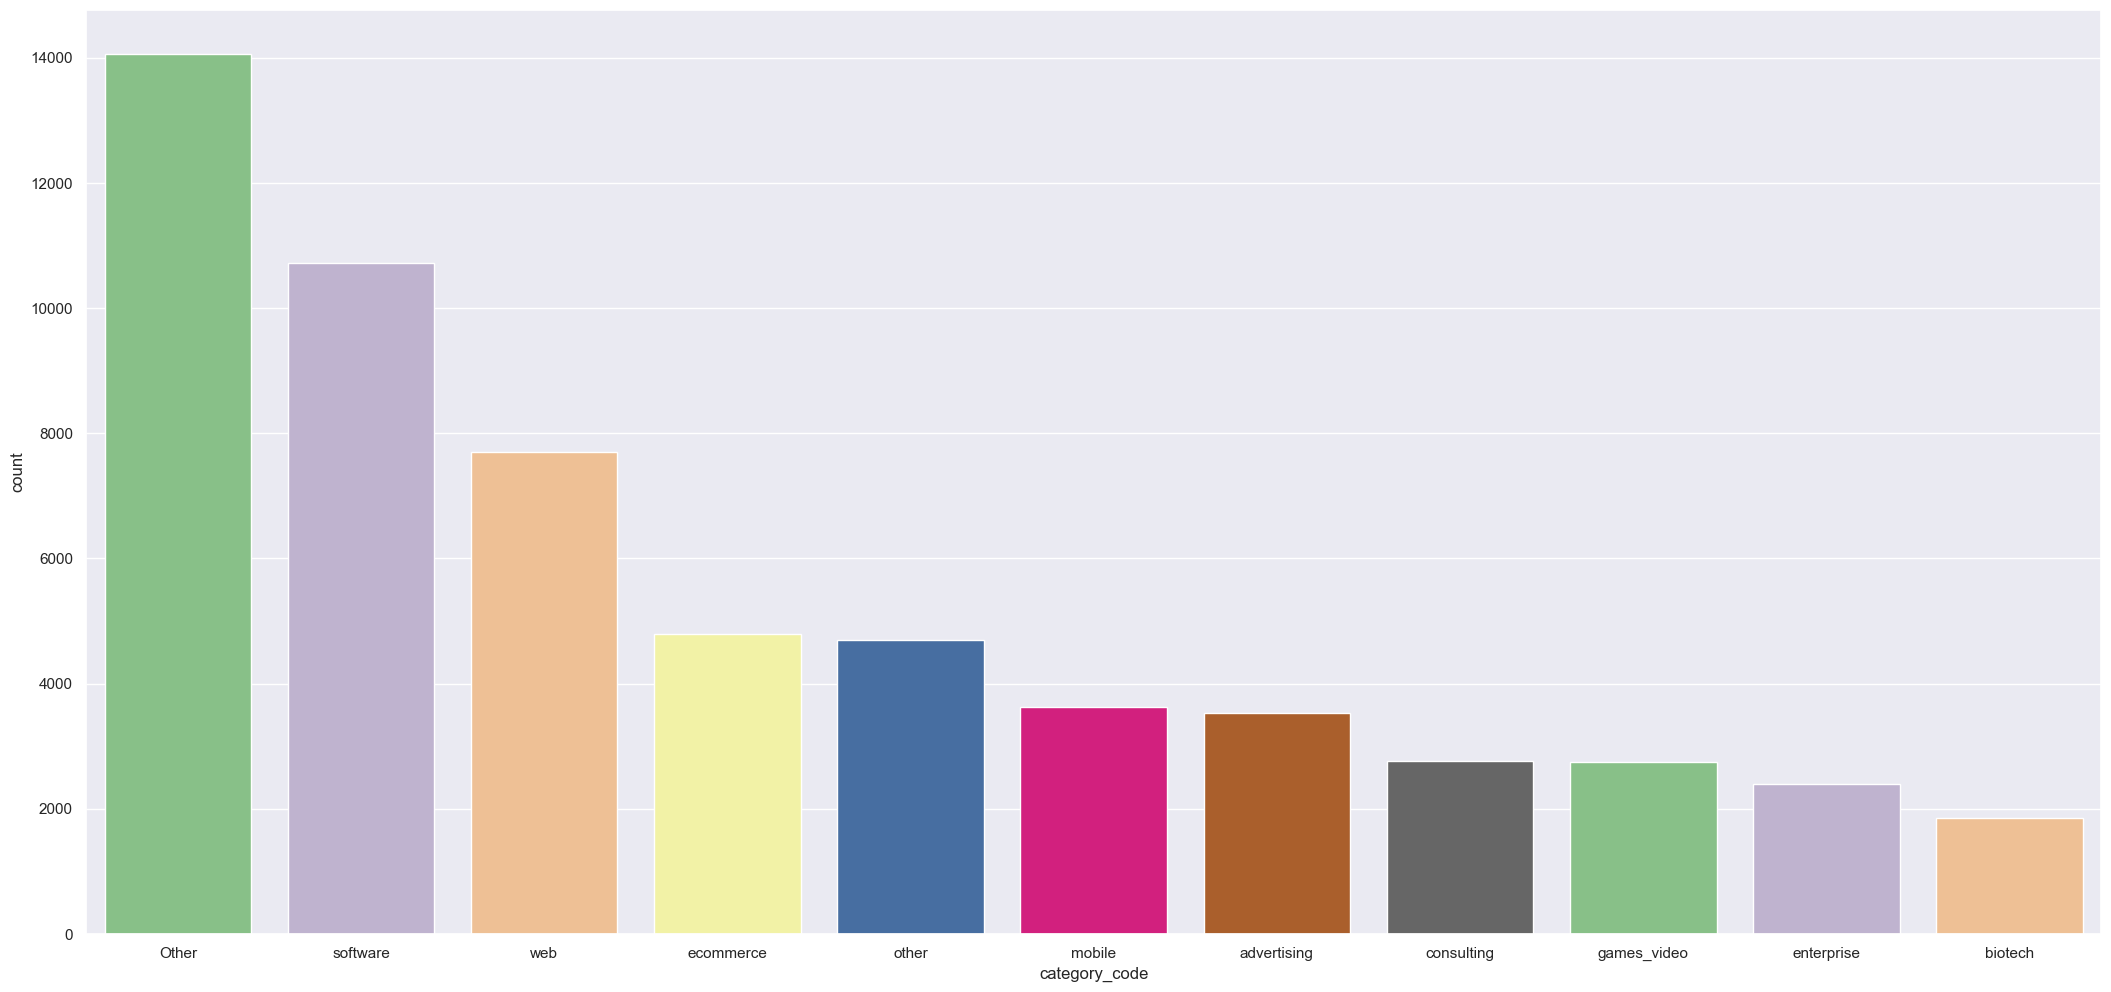

In [73]:
# for categorical datas
# Bar graph

plt.figure(figsize=(26,12))
sns.countplot(x='category_code', data=company, order= company.category_code.value_counts().index, palette='Accent')
plt.xlabel('category_code')
plt.ylabel('count')

Text(0, 0.5, 'count')

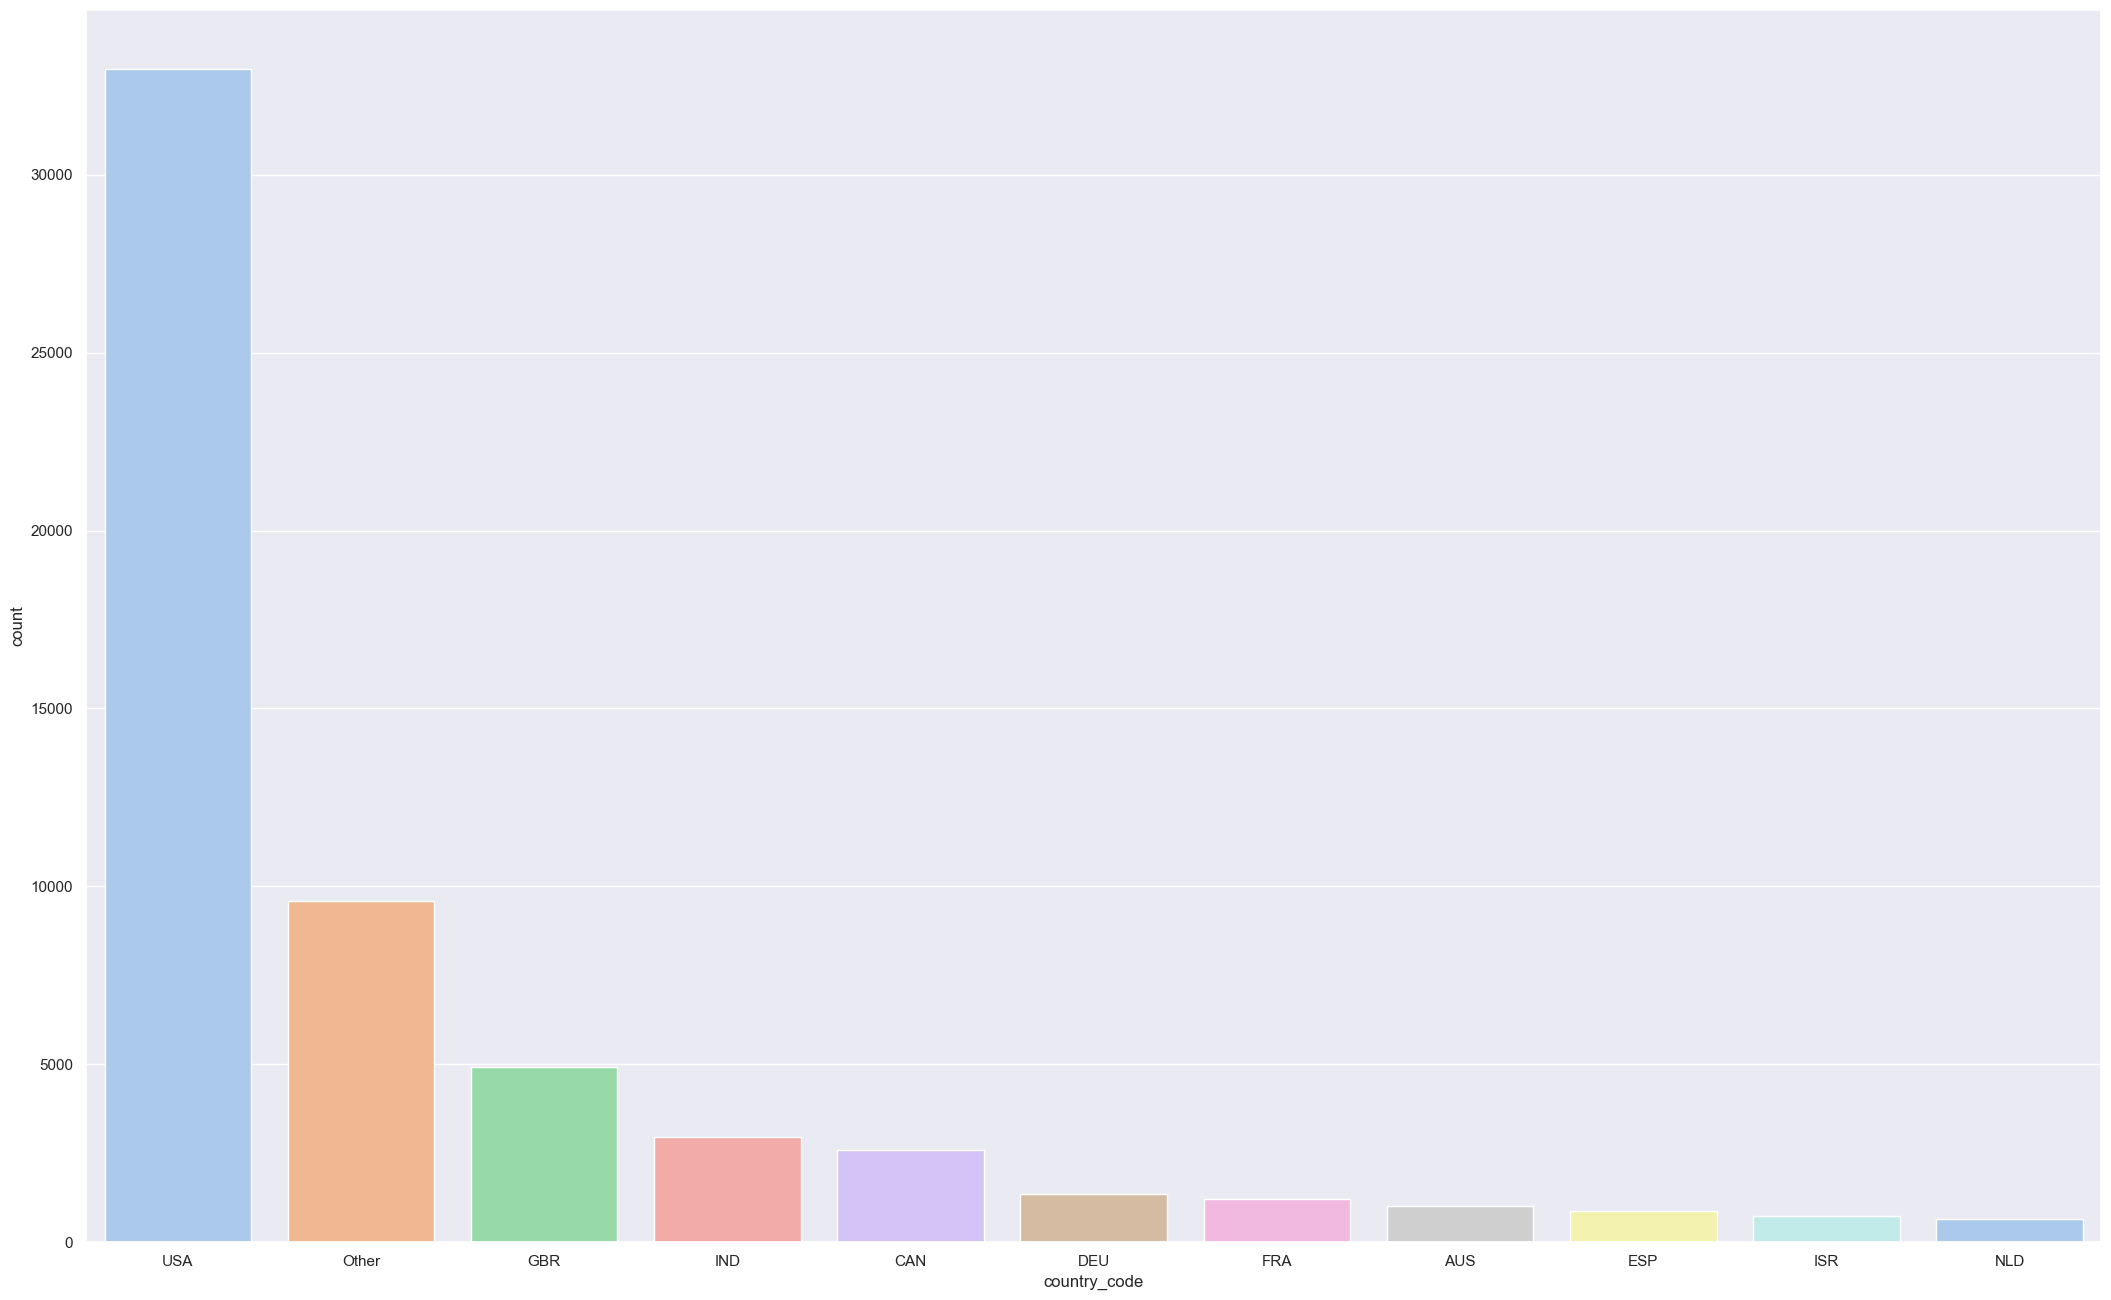

In [74]:
plt.figure(figsize=(26,16))
sns.countplot(x='country_code', data=company, order= company.country_code.value_counts().index, palette='pastel')
plt.xlabel('country_code')
plt.ylabel('count')

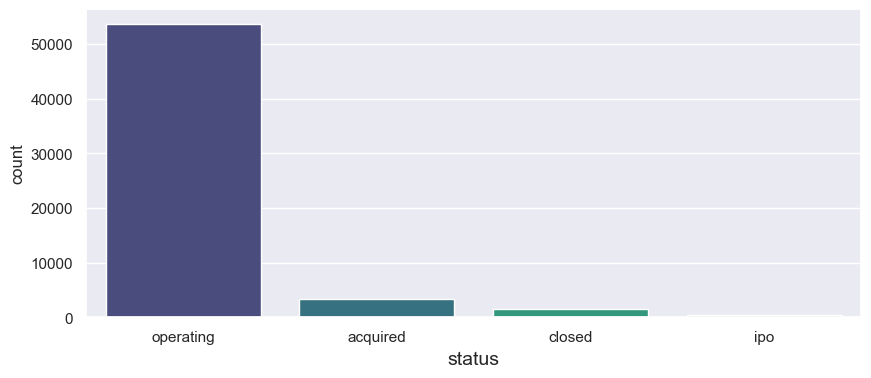

In [75]:
plt.figure(figsize=(10,4))
sns.countplot(x='status' , data=company, palette='viridis')
plt.xlabel('status', fontsize=14)
plt.show()

In [76]:
# pairplot to show the relation of each feature with every other feature

#plt.figure(figsize=(15,15))
#sns.pairplot(company)

#### Multivariate Analysis

#### Correlation Matrix

<Axes: >

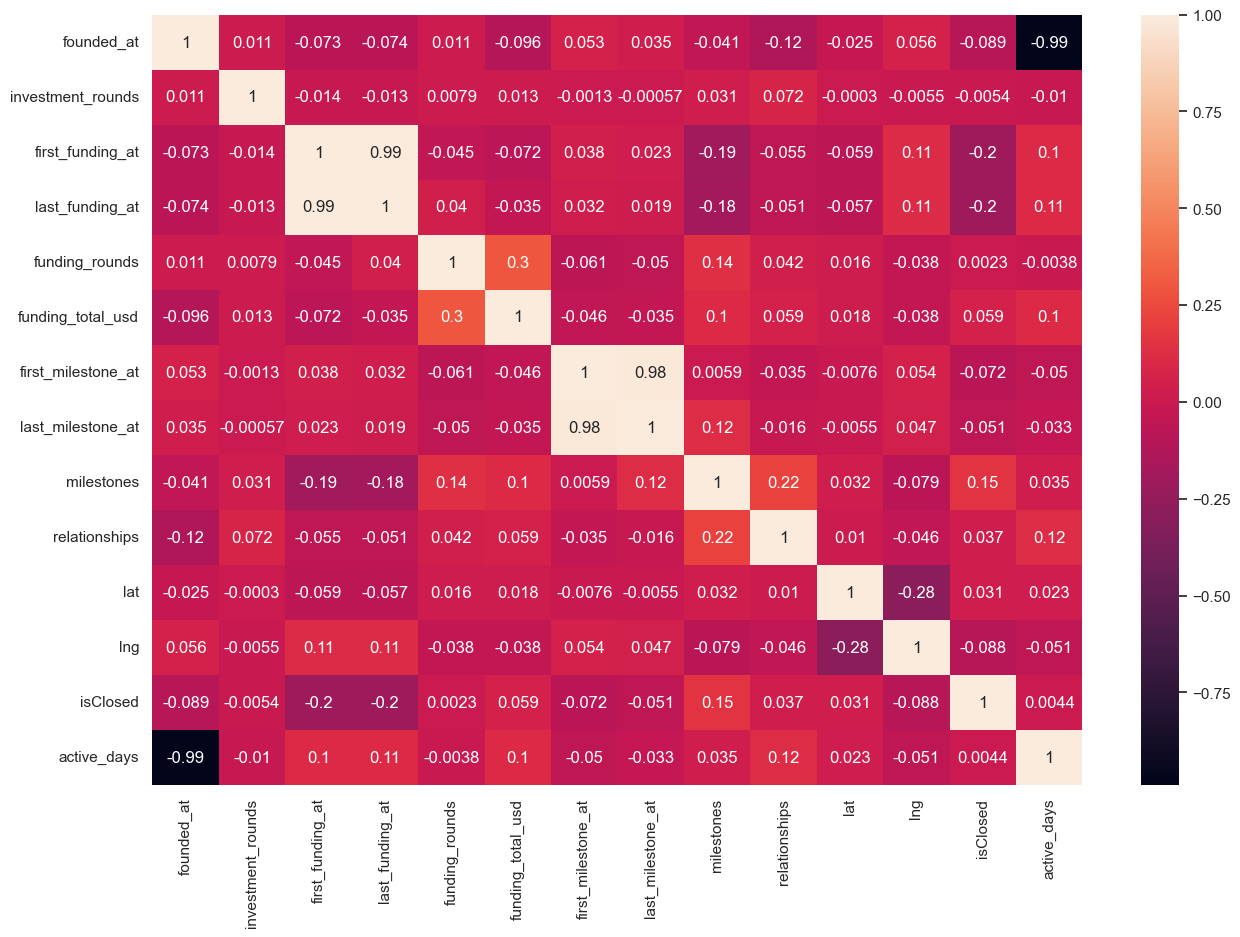

In [77]:
plt.figure(figsize=(15, 10))
sns.heatmap(company.corr(), annot=True)

In [78]:
company['isClosed'].value_counts()

0    54092
1     4762
Name: isClosed, dtype: int64

In [79]:
company['status'].value_counts()

operating    53682
acquired      3291
closed        1471
ipo            410
Name: status, dtype: int64

## <font color = blue>Feature Engineering:

#### Mutual Information Analysis

In [80]:
X = company.copy()
y = X.pop("status")

#Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [81]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y_encoded, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y_encoded, discrete_features)
mi_scores

isClosed               0.280991
active_days            0.126734
last_funding_at        0.039694
first_funding_at       0.038136
founded_at             0.036504
funding_total_usd      0.025239
funding_rounds         0.023938
investment_rounds      0.020261
relationships          0.018645
milestones             0.017025
lng                    0.016312
lat                    0.015339
first_milestone_at     0.013968
country_code           0.010626
category_code          0.008013
last_milestone_at      0.007664
first_investment_at    0.005875
last_investment_at     0.003772
Name: MI Scores, dtype: float64

This indicates that the isClosed and active_days has relatively high MI score which means it has a strong relation with the target variable.It suggests that changes in the "active_days" feature are informative about changes in the target variable.

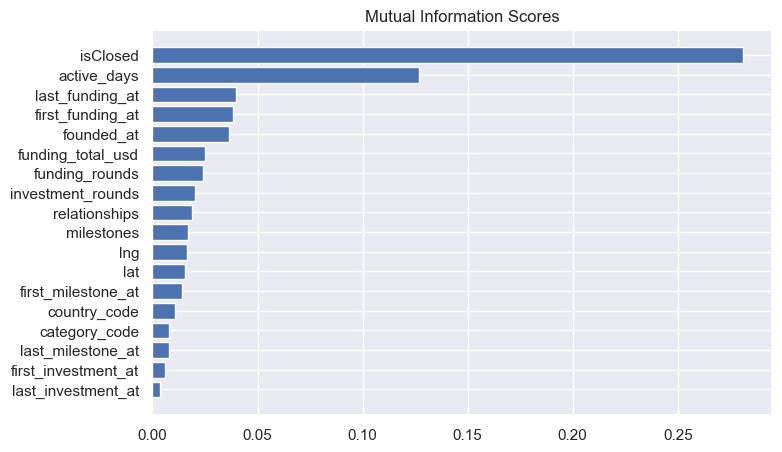

In [82]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

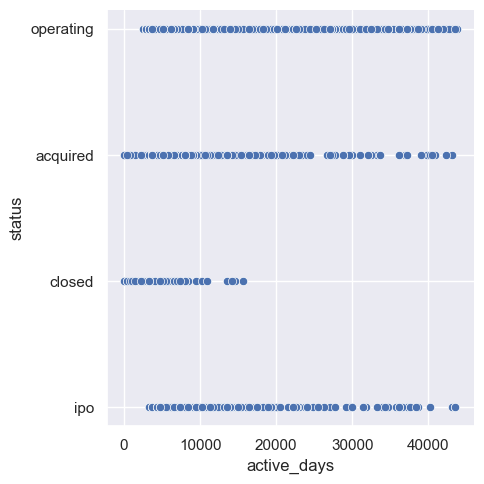

In [83]:
sns.relplot(x="active_days", y="status", data=company);

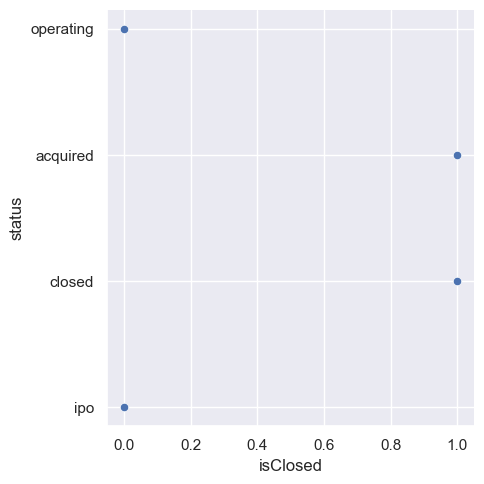

In [84]:
sns.relplot(x="isClosed", y="status", data=company)

## <font color = blue> Principal Component Analysis 

Select the features that has comparatively high MI scores so that this approach might result in a more interpretable and potentially more predictive model.

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
selected_features = ['active_days', 'isClosed','founded_at', 'last_funding_at', 'first_funding_at']

X = X.loc[:, selected_features]

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Standardize
# X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [88]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.619447,-0.739982,0.024664,0.004186,0.000907
1,-0.530337,-0.850786,0.009936,0.002893,0.000693
2,-0.530337,-0.850786,0.009936,0.002893,0.000693
3,2.746371,2.304588,-2.495978,-0.205042,-0.139581
4,-0.530337,-0.850786,0.009936,0.002893,0.000693


In [89]:
# Define FunctionTransformer for PCA Data
pca_data = FunctionTransformer(lambda x: x)     #Define a FunctionTransformer to pass X_pca directly 
                                                                                    #Without modification in Pipeline
# Split transformed data into training and testing sets
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [90]:
# Define the plot_variance function

def plot_variance(pca):
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(12, 6))
    
#Explained Variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='green', alpha=0.7)
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
    plt.title('Cumulative Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)


    plt.subplots_adjust(wspace=5)
    plt.tight_layout()
    plt.show()

In [91]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
active_days,-0.451246,0.535730,0.111361,-0.679836,-0.186528
isClosed,0.146803,0.245863,-0.956352,-0.056634,-0.013543
founded_at,0.430467,-0.560250,-0.034937,-0.681981,-0.185738
last_funding_at,-0.543339,-0.411168,-0.188028,-0.181733,0.683624
first_funding_at,-0.542500,-0.411832,-0.190825,0.191026,-0.680576


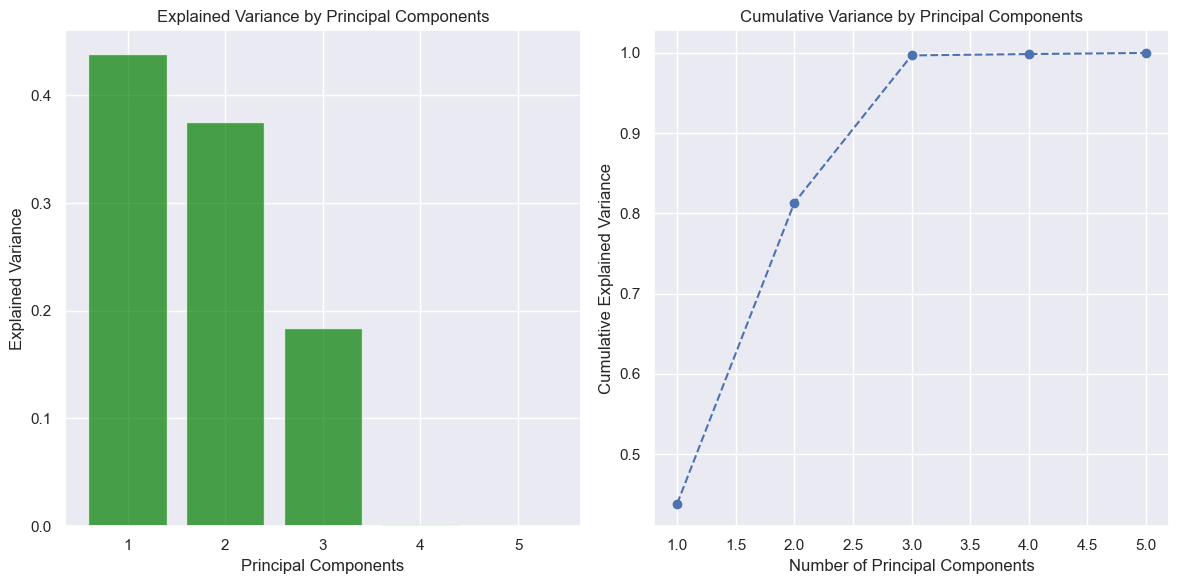

In [92]:
plot_variance(pca);

In [93]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC4    0.332092
PC3    0.324192
PC5    0.314853
PC2    0.309241
PC1    0.300440
Name: MI Scores, dtype: float64

### <font color = blue> Train and Evaluate the models by applying Classification Algorithms:

In [94]:
# Hold Out Techiniques:

# Split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [95]:
# Function to train and evaluate models

def train_and_evaluate_models(model,algorithm_name, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print results
    print(f"Results for {algorithm_name}:")
    print("Confusion matrix: ", cm)
    print("Classification Report:")
    print(report)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

### Naive Bayes 

In [96]:
# Model1 = Gaussian Naive Bayes

model = GaussianNB()
train_and_evaluate_models(model,"Gaussian Naive Bayes", x_train, y_train, x_test, y_test)

# Calculate accuracy for Gaussian Naive Bayes
y_pred = model.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred)

Results for Gaussian Naive Bayes:
Confusion matrix:  [[  565    95     1     0]
 [   30   267     0     0]
 [    1     0    21    64]
 [    0     0   264 10463]]
Classification Report:
              precision    recall  f1-score   support

    acquired       0.95      0.85      0.90       661
      closed       0.74      0.90      0.81       297
         ipo       0.07      0.24      0.11        86
   operating       0.99      0.98      0.98     10727

    accuracy                           0.96     11771
   macro avg       0.69      0.74      0.70     11771
weighted avg       0.98      0.96      0.97     11771

Accuracy: 0.9613456800611673
Precision: 0.9781476427589881
Recall: 0.9613456800611673
F1-score: 0.9689956223026631


#### Compare the train-set and test-set accuracy

In [97]:
# Initialize the model
model = GaussianNB()

# Fit the model on the training set
model.fit(x_train, y_train)

# Calculate accuracy for the training set
y_train_pred = model.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the test set
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

Training Set Accuracy: 0.9644882441645605
Test Set Accuracy: 0.9613456800611673


#### Cross-validation using StratifiedKFold

In [98]:
model = GaussianNB()
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold , scoring='accuracy')
print("Cross-Validation Scores: ", scores)

# Calculate and display the mean and standard deviation of the scores
print("Mean Accuracy: ", scores.mean())
print("Standard Deviation of Accuracy: ", scores.std())

Cross-Validation Scores:  [0.88553833 0.87916755 0.88405182 0.87956669 0.88254036 0.88381478
 0.88657604 0.88062872 0.87701784 0.88721325]
Mean Accuracy:  0.882611538706499
Standard Deviation of Accuracy:  0.003245605970777535


## Hyperparameter Tuning for Naive Bayes

In [99]:
# Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

# Define the hyperparameters and their ranges to search for Gaussian Naive Bayes
param = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [100]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1)

# Fit RandomizedSearchCV on training data
random_search.fit(x_train, y_train)

# Get the best model from RandomizedSearchCV
best_model_random = random_search.best_estimator_

# Train and evaluate the best model from RandomizedSearchCV
train_and_evaluate_models(best_model_random, "Naive Bayes (RandomizedSearchCV)", x_train, y_train, x_test, y_test)

# Calculate accuracy for the best model from RandomizedSearchCV
accuracy_random = accuracy_score(y_test, best_model_random.predict(x_test))

Results for Naive Bayes (RandomizedSearchCV):
Confusion matrix:  [[  565    95     1     0]
 [   30   267     0     0]
 [    1     0    21    64]
 [    0     0   264 10463]]
Classification Report:
              precision    recall  f1-score   support

    acquired       0.95      0.85      0.90       661
      closed       0.74      0.90      0.81       297
         ipo       0.07      0.24      0.11        86
   operating       0.99      0.98      0.98     10727

    accuracy                           0.96     11771
   macro avg       0.69      0.74      0.70     11771
weighted avg       0.98      0.96      0.97     11771

Accuracy: 0.9613456800611673
Precision: 0.9781476427589881
Recall: 0.9613456800611673
F1-score: 0.9689956223026631


In [101]:
# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid=param, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(x_train, y_train)

# Get the best model from GridSearchCV
best_model_grid = grid_search.best_estimator_

# Train and evaluate the best model from GridSearchCV
train_and_evaluate_models(best_model_grid, "Naive Bayes (GridSearchCV)", x_train, y_train, x_test, y_test)

# Calculate accuracy for the best model from GridSearchCV
accuracy_grid = accuracy_score(y_test, best_model_grid.predict(x_test))

Results for Naive Bayes (GridSearchCV):
Confusion matrix:  [[  565    95     1     0]
 [   30   267     0     0]
 [    1     0    21    64]
 [    0     0   264 10463]]
Classification Report:
              precision    recall  f1-score   support

    acquired       0.95      0.85      0.90       661
      closed       0.74      0.90      0.81       297
         ipo       0.07      0.24      0.11        86
   operating       0.99      0.98      0.98     10727

    accuracy                           0.96     11771
   macro avg       0.69      0.74      0.70     11771
weighted avg       0.98      0.96      0.97     11771

Accuracy: 0.9613456800611673
Precision: 0.9781476427589881
Recall: 0.9613456800611673
F1-score: 0.9689956223026631


In [102]:
# Define the Pipeline
pipeline = Pipeline([
    ('pca_data', pca_data),  # Pass X_pca directly
    ('model', GaussianNB())
])

# Fit and Predict with the Pipeline
pipeline.fit(X_pca_train, y_train)

# Predict on the transformed test data using the fitted pipeline
y_pred_pipeline = pipeline.predict(X_pca_test)

#Evaluate the Model
train_and_evaluate_models(pipeline, 'Gaussian Naive Bayes Pipeline', X_pca_train, y_train, X_pca_test, y_test)

# Calculate the accuracy for the Pipeline
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)

Results for Gaussian Naive Bayes Pipeline:
Confusion matrix:  [[  652     8     1     0]
 [    0   296     1     0]
 [    0     0    22    64]
 [   42     0   242 10443]]
Classification Report:
              precision    recall  f1-score   support

    acquired       0.94      0.99      0.96       661
      closed       0.97      1.00      0.99       297
         ipo       0.08      0.26      0.12        86
   operating       0.99      0.97      0.98     10727

    accuracy                           0.97     11771
   macro avg       0.75      0.80      0.76     11771
weighted avg       0.98      0.97      0.98     11771

Accuracy: 0.9695862713448306
Precision: 0.9836848230081167
Recall: 0.9695862713448306
F1-score: 0.9761805009525186


In [103]:
# Evaluate the Accuracies:

print("Gaussian Naive Bayes Accuracy:", accuracy_nb)
print("RandomizedSearchCV Accuracy:", accuracy_random)
print("GridSearchCV Accuracy:", accuracy_grid)
print("Pipeline Accuracy:", accuracy_pipeline)

Gaussian Naive Bayes Accuracy: 0.9613456800611673
RandomizedSearchCV Accuracy: 0.9613456800611673
GridSearchCV Accuracy: 0.9613456800611673
Pipeline Accuracy: 0.9695862713448306


### Gradient Boosting Algorithms

In [104]:
# Model1 = Gradient Boosting Classifier     #A basic implementation which is Flexible and user-friendly

model = GradientBoostingClassifier()
train_and_evaluate_models(model, "Gradient Boosting Classifier", x_train, y_train, x_test, y_test)

# Calculate accuracy for Gradient Boosting Classifier
y_pred = model.predict(x_test)
accuracy_gbc = accuracy_score(y_test, y_pred)

Results for Gradient Boosting Classifier:
Confusion matrix:  [[  654     7     0     0]
 [    6   291     0     0]
 [    0     0     1    85]
 [    0     0     3 10724]]
Classification Report:
              precision    recall  f1-score   support

    acquired       0.99      0.99      0.99       661
      closed       0.98      0.98      0.98       297
         ipo       0.25      0.01      0.02        86
   operating       0.99      1.00      1.00     10727

    accuracy                           0.99     11771
   macro avg       0.80      0.75      0.75     11771
weighted avg       0.99      0.99      0.99     11771

Accuracy: 0.9914195905190722
Precision: 0.9862508904964169
Recall: 0.9914195905190722
F1-score: 0.9880285998129716


In [105]:
# Model2 = eXtreme Gradient Boosting (XGBoost)     #Extensive customization options and regularization techniques and 
                                                                            # Offers speed, accuracy, and flexibility

# Use LabelEncoder to convert string labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost model
model = XGBClassifier()

# Train and evaluate the model using the custom function
train_and_evaluate_models(model, "XGBoost", x_train, y_train_encoded, x_test, y_test_encoded)

# Calculate accuracy for XGBoost
y_pred = model.predict(x_test)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred)

Results for XGBoost:
Confusion matrix:  [[  654     7     0     0]
 [    8   289     0     0]
 [    0     0     1    85]
 [    0     0     5 10722]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       661
           1       0.98      0.97      0.97       297
           2       0.17      0.01      0.02        86
           3       0.99      1.00      1.00     10727

    accuracy                           0.99     11771
   macro avg       0.78      0.74      0.75     11771
weighted avg       0.99      0.99      0.99     11771

Accuracy: 0.9910797723218079
Precision: 0.9854686085360219
Recall: 0.9910797723218079
F1-score: 0.9877690734927865


In [106]:
# Model3 = Light Gradient Boosting (LightGBM)     #Focused on speed and efficiency

# Initialize the LightGBM model with higher verbosity
model = LGBMClassifier(verbosity=0)     #verbosity=0 means that no additional information will be printed during training

# Train and evaluate the model using the custom function
train_and_evaluate_models(model, "LightGBM", x_train, y_train, x_test, y_test)

# Calculate accuracy for LightGBM
y_pred = model.predict(x_test)
accuracy_lgbm = accuracy_score(y_test, y_pred)

Results for LightGBM:
Confusion matrix:  [[  653     8     0     0]
 [    3   294     0     0]
 [    0     0     1    85]
 [    0     0     6 10721]]
Classification Report:
              precision    recall  f1-score   support

    acquired       1.00      0.99      0.99       661
      closed       0.97      0.99      0.98       297
         ipo       0.14      0.01      0.02        86
   operating       0.99      1.00      1.00     10727

    accuracy                           0.99     11771
   macro avg       0.78      0.75      0.75     11771
weighted avg       0.99      0.99      0.99     11771

Accuracy: 0.9913346359697561
Precision: 0.9856441009933247
Recall: 0.9913346359697561
F1-score: 0.9880674047450771


In [107]:
# Model4 = CatBoost     #Cat:Stands for "Category" highlighting its ability to effectively handle categorical features.

# Initialize the CatBoost model
model = CatBoostClassifier(verbose=0)     #verbose=0 means that no additional information will be printed during training

# Train and evaluate the model using the custom function
train_and_evaluate_models(model, "CatBoost", x_train, y_train, x_test, y_test)

# Calculate accuracy for CatBoost
y_pred = model.predict(x_test)
accuracy_cb = accuracy_score(y_test, y_pred)

Results for CatBoost:
Confusion matrix:  [[  653     8     0     0]
 [    2   295     0     0]
 [    0     0     1    85]
 [    0     0     4 10723]]
Classification Report:
              precision    recall  f1-score   support

    acquired       1.00      0.99      0.99       661
      closed       0.97      0.99      0.98       297
         ipo       0.20      0.01      0.02        86
   operating       0.99      1.00      1.00     10727

    accuracy                           0.99     11771
   macro avg       0.79      0.75      0.75     11771
weighted avg       0.99      0.99      0.99     11771

Accuracy: 0.9915894996177045
Precision: 0.98615046498668
Recall: 0.9915894996177045
F1-score: 0.9882409899093864


In [108]:
# Model5 = Adaptive Boosting (AdaBoost)    #One of the first boosting algorithms and it is a Simpler approach

# Initialize the AdaBoost model
model = AdaBoostClassifier()

# Train and evaluate the model using the custom function
train_and_evaluate_models(model, "AdaBoost", x_train, y_train, x_test, y_test)

# Calculate accuracy for AdaBoost
y_pred = model.predict(x_test)
accuracy_ab = accuracy_score(y_test, y_pred)

Results for AdaBoost:
Confusion matrix:  [[  661     0     0     0]
 [  297     0     0     0]
 [    0     0     0    86]
 [    0     0     0 10727]]
Classification Report:
              precision    recall  f1-score   support

    acquired       0.69      1.00      0.82       661
      closed       0.00      0.00      0.00       297
         ipo       0.00      0.00      0.00        86
   operating       0.99      1.00      1.00     10727

    accuracy                           0.97     11771
   macro avg       0.42      0.50      0.45     11771
weighted avg       0.94      0.97      0.95     11771

Accuracy: 0.9674624076119276
Precision: 0.9428052155219828
Recall: 0.9674624076119276
F1-score: 0.9535225126607769


In [109]:
# Evaluate the Accuracies for Gradient Boosting Algorithms:

print("Accuracy for Gradient Boosting Classifier:",accuracy_gbc)
print("Accuracy for XGBoost:",accuracy_xgb)
print("Accuracy for LightGBM:",accuracy_lgbm)
print("Accuracy for CatBoost:",accuracy_cb)
print("Accuracy for AdaBoost:",accuracy_ab)

Accuracy for Gradient Boosting Classifier: 0.9914195905190722
Accuracy for XGBoost: 0.9910797723218079
Accuracy for LightGBM: 0.9913346359697561
Accuracy for CatBoost: 0.9915894996177045
Accuracy for AdaBoost: 0.9674624076119276


#### Compare the train-set and test-set accuracy

In [110]:
# Initialize the model
model = GradientBoostingClassifier()

# Fit the model on the training set
model.fit(x_train, y_train)

# Calculate accuracy for the training set
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the test set
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

Training Set Accuracy: 0.9929273835566977
Test Set Accuracy: 0.9914195905190722


#### Cross-validation using StratifiedKFold

In [111]:
model = GradientBoostingClassifier()
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold , scoring='accuracy')
print("Cross-Validation Scores: ", scores)

# Calculate and display the mean and standard deviation of the scores
print("Mean Accuracy: ", scores.mean())
print("Standard Deviation of Accuracy: ", scores.std())

Cross-Validation Scores:  [0.99150563 0.99150563 0.99193035 0.99256585 0.99171623 0.99341546
 0.99256585 0.99192863 0.99256585 0.99214104]
Mean Accuracy:  0.9921840496686238
Standard Deviation of Accuracy:  0.0005678474369161619


## Hyperparameter Tuning for Gradient Boosting Classifier

In [112]:
# Initialize the model
model = GradientBoostingClassifier()

In [113]:
# Define hyperparameter
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'subsample': [0.8, 0.84, 0.88, 0.92, 0.96, 1.0]

}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1)

# Fit RandomizedSearchCV on training data
random_search.fit(x_train, y_train)

# Get the best model from RandomizedSearchCV
best_model_random = random_search.best_estimator_

# Train and evaluate the best model from RandomizedSearchCV
train_and_evaluate_models(best_model_random, "Gradient Boosting Classifier (RandomizedSearchCV)", x_train, y_train, x_test, y_test)

# Calculate accuracy for the best model from RandomizedSearchCV
accuracy_random = accuracy_score(y_test, best_model_random.predict(x_test))

Results for Gradient Boosting Classifier (RandomizedSearchCV):
Confusion matrix:  [[  655     6     0     0]
 [   19   278     0     0]
 [    0     0     0    86]
 [    0     0     3 10724]]
Classification Report:
              precision    recall  f1-score   support

    acquired       0.97      0.99      0.98       661
      closed       0.98      0.94      0.96       297
         ipo       0.00      0.00      0.00        86
   operating       0.99      1.00      1.00     10727

    accuracy                           0.99     11771
   macro avg       0.74      0.73      0.73     11771
weighted avg       0.98      0.99      0.99     11771

Accuracy: 0.9903151813779628
Precision: 0.9833278511153679
Recall: 0.9903151813779628
F1-score: 0.9867907168654221


In [114]:
# Define FunctionTransformer for PCA Data
pca_data = FunctionTransformer(lambda x: x)

# Define the Pipeline
pipeline = Pipeline([
    ('pca_data', pca_data),  # Pass X_pca directly
    ('model', GradientBoostingClassifier())
])

# Fit and Predict with the Pipeline
pipeline.fit(X_pca_train, y_train)

# Predict on the transformed test data using the fitted pipeline
y_pred_pipeline = pipeline.predict(X_pca_test)

#Evaluate the Model
train_and_evaluate_models(pipeline, 'Gradient Boosting Classifier Pipeline', X_pca_train, y_train, X_pca_test, y_test)

# Calculate the accuracy for the Pipeline
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)

Results for Gradient Boosting Classifier Pipeline:
Confusion matrix:  [[  653     8     0     0]
 [    3   294     0     0]
 [    0     0     1    85]
 [    0     0     5 10722]]
Classification Report:
              precision    recall  f1-score   support

    acquired       1.00      0.99      0.99       661
      closed       0.97      0.99      0.98       297
         ipo       0.17      0.01      0.02        86
   operating       0.99      1.00      1.00     10727

    accuracy                           0.99     11771
   macro avg       0.78      0.75      0.75     11771
weighted avg       0.99      0.99      0.99     11771

Accuracy: 0.9914195905190722
Precision: 0.9858187188523901
Recall: 0.9914195905190722
F1-score: 0.9881116108881346


In [115]:
# Evaluate the Accuracies:

print("Gradient Boosting Classifier Accuracy:", accuracy_gbc)
print("RandomizedSearchCV Accuracy:", accuracy_random)
print("GridSearchCV Accuracy:", )
print("Pipeline Accuracy:", accuracy_pipeline)

Gradient Boosting Classifier Accuracy: 0.9914195905190722
RandomizedSearchCV Accuracy: 0.9903151813779628
GridSearchCV Accuracy:
Pipeline Accuracy: 0.9914195905190722


## <font color = blue> Model Pipeline:

In [116]:
X = company.copy()
y = company[['status', 'isClosed']]
yStatus = X.pop('status')
yClosed = X.pop('isClosed')

In [117]:
# Label encoding for categoricals in X
label_encoders = {}  # to store label encoders for each column
for colname in X.select_dtypes("object"):
    label_encoders[colname] = LabelEncoder()
    X[colname] = label_encoders[colname].fit_transform(X[colname])

# Label encoding for each target variable separately
label_encoder_status = LabelEncoder()
y['status'] = label_encoder_status.fit_transform(y['status'])

label_encoder_isClosed = LabelEncoder()
y['isClosed'] = label_encoder_isClosed.fit_transform(y['isClosed'])

In [118]:
X.columns

Index(['category_code', 'founded_at', 'country_code', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'active_days'],
      dtype='object')

In [119]:
closed = yClosed.value_counts(); print(closed)
status = yStatus.value_counts(); print(status)

0    54092
1     4762
Name: isClosed, dtype: int64
operating    53682
acquired      3291
closed        1471
ipo            410
Name: status, dtype: int64


## <font color = blue> Train and Evaluate the Models by applying Classification Algorithms:

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Extracting specific columns for different target variables:

yStatus_train = y_train.iloc[:,0]
yClosed_train = y_train.iloc[:,1]

yStatus_test = y_test.iloc[:,0]
yClosed_test = y_test.iloc[:,1]

### Data Preprocessing:

In [121]:
stdscaler = StandardScaler()
scaler = MinMaxScaler()

pca = PCA(n_components=5)

In [122]:
# Creating instances for classifiers:

LR = LogisticRegression()
GB = GradientBoostingClassifier()

###  Logistic Regression

In [123]:
model_lr = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', LR)
])

In [124]:
# Fit the model:
model_lr.fit(X_train, yClosed_train)

# Predict on the test set:
pred_lr = model_lr.predict(X_test)

In [125]:
# Print Accuracy
print('Test Accuracy = ', round(accuracy_score(yClosed_test, pred_lr)*100, 2), '%')

Test Accuracy =  91.72 %


#### Compare the Train set and Test set Accuracy

In [126]:
# Predict on the training set
train_pred = model_lr.predict(X_train)

# Predict on the test set
test_pred = model_lr.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(yClosed_train, train_pred)
test_accuracy = accuracy_score(yClosed_test, test_pred)

# Print results
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9191215513030181
Test Set Accuracy: 0.9171693144167871


In [127]:
# Model Evaluation
accuracy = accuracy_score(yClosed_test,pred_lr)
precision = precision_score(yClosed_test,pred_lr,average='weighted')
recall = recall_score(yClosed_test,pred_lr,average='weighted')
f1 = f1_score(yClosed_test,pred_lr,average='weighted')

cm = confusion_matrix(yClosed_test,pred_lr)
report = classification_report(yClosed_test,pred_lr,digits=3)

# Print results
print("Results for Logistic Regression:")
print("Confusion matrix: ", cm)
print("Classification Report:")
print(report)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Results for Logistic Regression:
Confusion matrix:  [[10793     8]
 [  967     3]]
Classification Report:
              precision    recall  f1-score   support

           0      0.918     0.999     0.957     10801
           1      0.273     0.003     0.006       970

    accuracy                          0.917     11771
   macro avg      0.595     0.501     0.481     11771
weighted avg      0.865     0.917     0.878     11771

Accuracy: 0.9171693144167871
Precision: 0.8646166003028206
Recall: 0.9171693144167871
F1-score: 0.8784431972632644


###  Gradient Boosting Classifier

In [128]:
model_gb = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', GB)
])

In [129]:
# Fit the model:
model_gb.fit(X_train, yStatus_train)

# Predict on the test set:
pred_gb = model_gb.predict(X_test)

In [130]:
# Print Accuracy
print('Test Accuracy = ', round(accuracy_score(yStatus_test, pred_gb)*100, 2), '%')

Test Accuracy =  92.22 %


#### Compare the Train set and Test set Accuracy

In [131]:
# Predict on the training set
train_pred = model_gb.predict(X_train)

# Predict on the test set
test_pred = model_gb.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(yStatus_train, train_pred)
test_accuracy = accuracy_score(yStatus_test, test_pred)

# Print results
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9289977274175393
Test Set Accuracy: 0.9221816328264378


In [132]:
# Model Evaluation
accuracy = accuracy_score(yStatus_test,pred_gb)
precision = precision_score(yStatus_test,pred_gb,average='weighted')
recall = recall_score(yStatus_test,pred_gb,average='weighted')
f1 = f1_score(yStatus_test,pred_gb,average='weighted')

cm = confusion_matrix(yStatus_test,pred_gb)
report = classification_report(yStatus_test,pred_gb,digits=3)

# Print results
print("Results for Logistic Regression:")
print("Confusion matrix: ", cm)
print("Classification Report:")
print(report)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Results for Logistic Regression:
Confusion matrix:  [[   26     3     0   611]
 [    3   154     0   173]
 [    4     0     8    72]
 [   24    18     8 10667]]
Classification Report:
              precision    recall  f1-score   support

           0      0.456     0.041     0.075       640
           1      0.880     0.467     0.610       330
           2      0.500     0.095     0.160        84
           3      0.926     0.995     0.959     10717

    accuracy                          0.922     11771
   macro avg      0.690     0.399     0.451     11771
weighted avg      0.896     0.922     0.896     11771

Accuracy: 0.9221816328264378
Precision: 0.8958630965910449
Recall: 0.9221816328264378
F1-score: 0.8956649385975077


In [133]:
print('Our Model')

# Print Accuracy
print('Logistic Regression Accuracy = ', round(accuracy_score(yClosed_test, pred_lr)*100, 2), '%')

# Print Accuracy
print('Gradient Boosting Classifier Accuracy = ', round(accuracy_score(yStatus_test, pred_gb)*100, 2), '%')

Our Model
Logistic Regression Accuracy =  91.72 %
Gradient Boosting Classifier Accuracy =  92.22 %


## <font color = blue> Model Pipeline:

In [134]:
df = company.copy()

In [135]:
X = df.copy()
y = df[['status', 'isClosed', 'active_days']]
yStatus = X.pop('status')
yClosed = X.pop('isClosed')
yActive = X.pop('active_days')

In [136]:
X.columns

Index(['category_code', 'founded_at', 'country_code', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng'],
      dtype='object')

In [137]:
X = X[[
    'founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships'
]]
X.columns

Index(['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships'],
      dtype='object')

In [138]:
closed = yClosed.value_counts(); print(closed)
status = yStatus.value_counts(); print(status)
# active = yActive.value_counts(); print(active)

0    54092
1     4762
Name: isClosed, dtype: int64
operating    53682
acquired      3291
closed        1471
ipo            410
Name: status, dtype: int64


## <font color = blue> Train and Evaluate the Models by applying Classification Algorithms:

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Extracting specific columns for different target variables:

yStatus_train = y_train.iloc[:,0]
yClosed_train = y_train.iloc[:,1]
yActive_train = y_train.iloc[:,2]

yStatus_test = y_test.iloc[:,0]
yClosed_test = y_test.iloc[:,1]
yActive_test = y_test.iloc[:,2]

### Data Preprocessing:

In [140]:
# Initialize oversampling and scaling techniques:

over = RandomOverSampler(random_state=0)
smote = SMOTE()

stdscaler = StandardScaler()
scaler = MinMaxScaler()

pca = PCA(n_components=2)

In [141]:
# Creating instances for classifiers:

LR = LogisticRegression()
GB = GradientBoostingClassifier()

###  Logistic Regression

In [142]:
model_lr = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', LR)
])

In [143]:
# Fit the model:
model_lr.fit(X_train, yClosed_train)

# Predict on the test set:
pred_lr = model_lr.predict(X_test)

In [144]:
# Print Accuracy
print('Test Accuracy = ', round(accuracy_score(yClosed_test, pred_lr)*100, 2), '%')

Test Accuracy =  91.71 %


#### Compare the Train set and Test set Accuracy

In [145]:
# Predict on the training set
train_pred = model_lr.predict(X_train)

# Predict on the test set
test_pred = model_lr.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(yClosed_train, train_pred)
test_accuracy = accuracy_score(yClosed_test, test_pred)

# Print results
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.919312703098783
Test Set Accuracy: 0.9170843598674709


In [146]:
# Model Evaluation
accuracy = accuracy_score(yClosed_test,pred_lr)
precision = precision_score(yClosed_test,pred_lr,average='weighted')
recall = recall_score(yClosed_test,pred_lr,average='weighted')
f1 = f1_score(yClosed_test,pred_lr,average='weighted')

cm = confusion_matrix(yClosed_test,pred_lr)
report = classification_report(yClosed_test,pred_lr,digits=3)

# Print results
print("Results for Logistic Regression:")
print("Confusion matrix: ", cm)
print("Classification Report:")
print(report)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Results for Logistic Regression:
Confusion matrix:  [[10794     7]
 [  969     1]]
Classification Report:
              precision    recall  f1-score   support

           0      0.918     0.999     0.957     10801
           1      0.125     0.001     0.002       970

    accuracy                          0.917     11771
   macro avg      0.521     0.500     0.479     11771
weighted avg      0.852     0.917     0.878     11771

Accuracy: 0.9170843598674709
Precision: 0.8523062289321222
Recall: 0.9170843598674709
F1-score: 0.8780723108500579


###  Gradient Boosting Classifier

In [147]:
model_gb = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', GB)
])

In [148]:
# Fit the model:
model_gb.fit(X_train, yStatus_train)

# Predict on the test set:
pred_gb = model_gb.predict(X_test)

In [149]:
# Print Accuracy
print('Test Accuracy = ', round(accuracy_score(yStatus_test, pred_gb)*100, 2), '%')

Test Accuracy =  90.93 %


#### Compare the Train set and Test set Accuracy

In [150]:
# Predict on the training set
train_pred = model_gb.predict(X_train)

# Predict on the test set
test_pred = model_gb.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(yStatus_train, train_pred)
test_accuracy = accuracy_score(yStatus_test, test_pred)

# Print results
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9161693180128709
Test Set Accuracy: 0.9092685413303883


In [151]:
# Model Evaluation
accuracy = accuracy_score(yStatus_test,pred_gb)
precision = precision_score(yStatus_test,pred_gb,average='weighted')
recall = recall_score(yStatus_test,pred_gb,average='weighted')
f1 = f1_score(yStatus_test,pred_gb,average='weighted')

cm = confusion_matrix(yStatus_test,pred_gb)
report = classification_report(yStatus_test,pred_gb,digits=3)

# Print results
print("Results for Logistic Regression:")
print("Confusion matrix: ", cm)
print("Classification Report:")
print(report)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Results for Logistic Regression:
Confusion matrix:  [[   16     0     0   624]
 [    2     0     2   326]
 [    1     0     3    80]
 [   20     3    10 10684]]
Classification Report:
              precision    recall  f1-score   support

    acquired      0.410     0.025     0.047       640
      closed      0.000     0.000     0.000       330
         ipo      0.200     0.036     0.061        84
   operating      0.912     0.997     0.953     10717

    accuracy                          0.909     11771
   macro avg      0.381     0.264     0.265     11771
weighted avg      0.854     0.909     0.870     11771

Accuracy: 0.9092685413303883
Precision: 0.8541355271021903
Recall: 0.9092685413303883
F1-score: 0.870306406755394


In [152]:
print('Sir Model')

# Print Accuracy
print('Logistic Regression Accuracy = ', round(accuracy_score(yClosed_test, pred_lr)*100, 2), '%')

# Print Accuracy
print('Gradient Boosting Classifier Accuracy = ', round(accuracy_score(yStatus_test, pred_gb)*100, 2), '%')

Sir Model
Logistic Regression Accuracy =  91.71 %
Gradient Boosting Classifier Accuracy =  90.93 %


###  Stacking ( Ensemble learning technique that combines multiple base models to improve overall predictive performance)

In [153]:
X = df.copy()
y = df[['status', 'isClosed']]
yStatus = X.pop('status')
yClosed = X.pop('isClosed')
X = X[[
    'founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships'
]]

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

ystatus_train = y_train.iloc[:,0]
yClosed_train = y_train.iloc[:,1]

ystatus_test = y_test.iloc[:,0]
yClosed_test = y_test.iloc[:,1]

In [155]:
pca = PCA(n_components = 5)
stdscaler = StandardScaler()

In [156]:
Log_regression = LogisticRegression()
Decision_tree = DecisionTreeClassifier()
Gradient_boosting = GradientBoostingClassifier()

In [ ]:
pipeline_grad_boosting = Pipeline([
    ('scaler', stdscaler),
    ('pca', pca),
    ('classifier', Gradient_boosting)
])

pipeline_grad_boosting.fit(X_train, ystatus_train)

pred1 = pipeline_grad_boosting.predict(X_test)

In [ ]:
estimators = [('Logistic Regression', Log_regression), ('Decision Tree', Decision_tree)]
final_estimator = Gradient_boosting
clf = StackingClassifier(estimators= estimators, final_estimator = final_estimator)

In [ ]:
model_ensemble = Pipeline([
    ('stdscaler', stdscaler),
    ('pca',pca),
    ('classifier', clf)
])

In [ ]:
model_ensemble.fit(X_train, ystatus_train)

In [ ]:
pred2 = model_ensemble.predict(X_test)
print('Ensemble Learning Accuracy = ', round(accuracy_score(ystatus_test, pred1)*100, 2), '%')

### Saving Model:

In [ ]:
# Save the Logistic Regression model to 'model_lr_raw.pkl'
pickle.dump(model_lr, open("model_lr_raw.pkl", "wb"))

# Save the Gradient Boosting model to 'model_gb_raw.pkl'
pickle.dump(model_gb, open("model_gb_raw.pkl", "wb"))